In [2]:
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
# Hyper parameters
batch_size = 128
epoch = 5

# Parameters for MNIST dataset
num_classes = 10

# Parameters for MLP
prob_drop_input = 0.2               # drop probability for dropout @ input layer
prob_drop_hidden = 0.5              # drop probability for dropout @ fc layer

In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, num_classes)
Y_Test = np_utils.to_categorical(y_test, num_classes)

In [36]:
#MLP
model = Sequential()
model.add(Dense(output_dim=625, input_dim=784, init='normal', activation='relu'))
model.add(Dropout(prob_drop_input))
model.add(Dense(output_dim=625, input_dim=625, init='normal', activation='relu'))
model.add(Dropout(prob_drop_hidden))
model.add(Dense(output_dim=10, input_dim=625, init='normal', activation='softmax'))
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

e:\development\deeplearning\deep_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=625, kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
e:\development\deeplearning\deep_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=625, activation="relu", units=625, kernel_initializer="normal")`
  """
e:\development\deeplearning\deep_env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=625, activation="softmax", units=10, kernel_initializer="normal")`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 625)               490625    
_________________________________________________________________
dropout_5 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 625)               391250    
_________________________________________________________________
dropout_6 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                6260      
Total params: 888,135
Trainable params: 888,135
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Entrenar y guardar el entrenamiento 
save_model(model, '../save/models')
checkpoint = ModelCheckpoint(filepath='../save/weights/weights.epoch.hdf5', verbose=0)
history = model.fit(X_train,Y_Train, epochs=epoch, 
                    batch_size=batch_size, callbacks=[checkpoint],
                   validation_data=(X_test,Y_Test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 333us/step - loss: 0.2595 - acc: 0.9206 - val_loss: 0.1090 - val_acc: 0.9673
Epoch 2/5
60000/60000 [==============================] - 21s 342us/step - loss: 0.1117 - acc: 0.9666 - val_loss: 0.0806 - val_acc: 0.9768
Epoch 3/5
60000/60000 [==============================] - 23s 384us/step - loss: 0.0833 - acc: 0.9756 - val_loss: 0.0754 - val_acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 20s 335us/step - loss: 0.0687 - acc: 0.9796 - val_loss: 0.0786 - val_acc: 0.9779
Epoch 5/5
60000/60000 [==============================] - 20s 327us/step - loss: 0.0571 - acc: 0.9842 - val_loss: 0.0989 - val_acc: 0.9774


In [38]:
#Evalución
evaluation = model.evaluate(X_test, Y_Test)
print('Loss=',evaluation[0])
print('Accuracy=',evaluation[1])

10000/10000 [==============================] - 1s 145us/step
Loss= 0.09889175333149615
Accuracy= 0.9774


In [39]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
# Creating the Confusion Matrix
cm = confusion_matrix(Y_Test.argmax(axis=1), y_pred.argmax(axis=1))
print (cm)

[[ 974    1    0    0    0    0    2    1    2    0]
 [   2 1125    2    0    0    1    2    0    3    0]
 [   9    1  990    0    3    0    5    8   16    0]
 [   9    0   10  960    0    6    0    6    9   10]
 [   1    0    0    0  966    0    5    2    0    8]
 [   3    0    0    2    1  876    6    1    2    1]
 [   3    2    0    0    3    3  945    0    2    0]
 [   4    2    4    0    1    0    0 1003    2   12]
 [  10    1    2    0    4    3    2    2  943    7]
 [   6    2    0    1    6    1    0    2    1  990]]


In [6]:
#Restaurar el modeloya guardado
loaded_model = load_model('../save/models')
loaded_model.load_weights('../save/weights/weights.epoch.hdf5')
loaded_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 625)               490625    
_________________________________________________________________
dropout_5 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 625)               391250    
_________________________________________________________________
dropout_6 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                6260      
Total params: 888,135
Trainable params: 888,135
Non-trainable params: 0
_______________

In [7]:
evaluation_loaded = loaded_model.evaluate(X_test, Y_Test)
print('Loss=',evaluation_loaded[0])
print('Accuracy=',evaluation_loaded[1])

10000/10000 [==============================] - 0s 28us/step
Loss= 0.09889175333149615
Accuracy= 0.9774


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

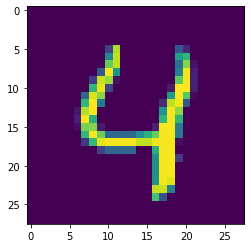

In [66]:
import numpy as np
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

test_im = X_test[4:5]
print(test_im)
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')

print(loaded_model.predict(X_test[4:5]))
